# Final Project Report

* Class: DS 5100
* Student Name: Molly Shand
* Student Net ID: sth5nz
* This URL: a URL to the notebook source of this document

# Instructions

Follow the instructions in the Final Project isntructions notebook and put evidence of your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Put the URL to your GitHub repo here.

Repo URL: https://github.com/mollyshand/DS5100-FinalProject

Paste a copyy of your module here.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

```
import numpy as np
import pandas as pd
```
```
class Die:
    """
    A die with N faces, each with a weight.
    
   Attributes:
       _df(DataFrame) : Internal data frame with faces as index and weights as the columns.
    """
    
    def __init__(self, faces: np.ndarray):
        """ 
        Initialized the die with a NumPy array of faces.
    
        Arguments:
            faces (np.ndarray): An array of unique face values (Can be numeric or string).
    
        Raises: 
            TypeError: If input is not a NumPy array.
            ValueError: If array elements are not unique.
        
        """
        if not isinstance(faces, np.ndarray):
            raise TypeError("Faces must be a NumPy array.")
        if len(np.unique(faces)) != len(faces):
            raise ValueError("Faces must be unique.")
            
        self._df = pd.DataFrame({
        'face': faces,
        'weight': np.ones(len(faces), dtype = float) }).set_index('face')
    
    def change_weight(self, face, weight):
        """
        Changes the weight of a specific face.
    
        Arguments:
            face: A face value in the die.
            weight: A numeric value.
    
        Raises:
            IndexError: If the face is not in the die.
            Type Error: If the weight is not numeric.
        """
    
        if face not in self._df.index:
            raise IndexError("Face not found in die.")
        try: 
            weight = float(weight)
        except (ValueError, TypeError):
            raise TypeError("Weight must be a numeric value.")
            
        self._df.at[face, 'weight'] = weight
        
    def roll(self, n_rolls = 1):
        """
        Rolls the die n times using the current weights.
    
        Arguments:
            n_rolls (int): Number of times to roll (default = 1).
        
        Returns:
            list: List of outcomes.
        """
    
        return list(self._df.sample(n = n_rolls, replace = True, weights = 'weight').index)
    
    def show(self):
        """
        Shows current faces and weights of the die.
    
        Returns:
            DataFrame: copy of internal state.
        """
    
        return self._df.copy()
```  

```   
class Game:
    """
    A game consists of rolling one or more dice 1+ times.
    
    Attributes:
        _dice (list): List of die objects.
        _results (DataFrame): Data frame storing results of the most recent play.
    """
    
    def __init__(self, dice: list):
        """
        Initializes a game with a list of die objects.
        
        Arguments:
            dice (list): list of die objects.
        
        Raises:
            TypeError: If elements in the list are not die objects.
        """
        
        if not all(hasattr(d, 'roll') and hasattr(d, 'show') for d in dice):
            raise TypeError("All items in dice must be die objects")
        self._dice = dice
        self._results = None
                
    def play(self, n_rolls: int):
        """
        Rolls all dice given a number of times and save the results.
        
        Arguments:
            n_rolls (int): Number of times to roll all dice. 
        """
        rolls = {}
        for i, die in enumerate(self._dice):
            rolls[i] = die.roll(n_rolls)
                   
        self._results = pd.DataFrame(rolls)
        self._results.index.name = "roll_number"
                   
    def show(self, form = 'wide'):
        """
        Returns the results of the most recent play.
        
        Arguments:
            form (str): 'wide' (default) or 'narrow' format.
        
        Returns:
            DataFrame: Results in the requested format.
            
        Raises: 
            ValueError: If form is not 'wide' or 'narrow'.
        """
        
        if self._results is None:
            raise ValueError("No results available. Run play() first.")
        if form == 'wide':
            return self._results.copy()
        elif form == 'narrow':
            return self._results.stack().to_frame('outcome')
        else: 
            raise ValueError("Form must be 'wide' or 'narrow'.")
```            
```           
class Analyzer:
    """
    An analyzer object takes the results of a single game and computes various descriptive statistical properties about it.
    
    Attributes:
        _game (Game): The game object to analyze.
        _face_counts_per_roll (DataFrame): Data frame of face counts per roll.
    """
    def __init__(self, game):
        """
        Initializes analyzer with a Game object.
        
        Arguments:
            game (Game): A game object that has been played
            
        Raises: 
            ValueError: If the provided object is not an instance of game.
        """
        
        if not hasattr(game, 'show'):
            raise ValueError("Input must be a Game object.")
        self._game = game
        self._results = game.show('wide')
        self._face_counts_per_roll = None
    
    def jackpot(self):
        """
        Counts how many rolls had all dice showing the same face.
        
        Returns:
            int: Number of jackpots.
        """
        
        return (self._results.nunique(axis = 1) == 1).sum()
    
    def face_counts_per_roll(self):
        """
        Counts how many times each face appeared in each roll.
        
        Returns:
            DataFrame: Rolls are row numbers, columns are the face values, and the cells are counts.
        """
        
        counts = self._results.apply(pd.Series.value_counts, axis = 1).fillna(0).astype(int)
        self._face_counts_per_roll = counts
        return counts
    
    def combo_count(self):
        """ 
        Computes counts of unique face combinations (order-independent).
        
        Returns:
            DataFrame: MultiIndex of combinations, with a column for their counts.
        """
        
        combos = self._results.apply(lambda row: tuple(sorted(row)), axis = 1)
        combo_counts = combos.value_counts().to_frame(name = 'count')
        combo_counts.index.name = 'combo'
        return combo_counts
    
    def permutation_count(self):
        """
        Computes counts of unique combinations (order-dependent).
        
        Returns: 
            DataFrame: MultiIndex of permutations, with a column for their counts.
        """
        
        perms = self._results.apply(lambda row: tuple(row), axis = 1)
        perm_counts = perms.value_counts().to_frame(name = 'count')
        perm_counts.index.name = 'permutation'
        return perm_counts
```

## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

```
import unittest
import numpy as np
import pandas as pd
from MonteCarlo import Die, Game, Analyzer
```
```
class TestDie(unittest.TestCase):
    
    def setUp(self):
        self.faces = np.array([1, 2, 3])
        self.die = Die(self.faces)
        
    def test_init_creates_dataframe(self):
        result = self.die.show()
        self.assertIsInstance(result, pd.DataFrame)
        self.assertEqual(set(result.columns), {'weight'})
        self.assertTrue((result['weight'] == 1.0).all())
    
    def test_change_weight_valid(self):
        self.die.change_weight(2, 3.5)
        result = self.die.show()
        self.assertEqual(result.loc[2, 'weight'], 3.5)
    
    def test_show_returns_dataframe(self):
        self.assertIsInstance(self.die.show(), pd.DataFrame)
```
```
class TestGame(unittest.TestCase):
    
    def setUp(self):
        self.dice = [Die(np.array(['H', 'T'])) for _ in range(3)]
        self.game = Game(self.dice)
        self.game.play(5)
    
    def test_play_creates_dataframe(self):
        result = self.game.show()
        self.assertIsInstance(result, pd.DataFrame)
        self.assertEqual(result.shape[0], 5)
                        
    def test_show_wide_format(self):
        wide = self.game.show('wide')
        self.assertIsInstance(wide, pd.DataFrame)
                        
    def test_show_narrow_format(self):
        narrow = self.game.show('narrow')
        self.assertIsInstance(narrow, pd.DataFrame)
        self.assertEqual(narrow.columns.tolist(), ['outcome'])
    
    def test_show_invalid_format_raises(self):
        with self.assertRaises(ValueError):
            self.game.show('invalid')
 ```
 ```
class TestAnalyzer(unittest.TestCase):
        
    def setUp(self):
        self.dice = [Die(np.array(['A', 'B'])) for _ in range(2)]
        self.game = Game(self.dice)
        self.game.play(10)
        self.analyzer = Analyzer(self.game)
                        
    def test_jackpot_returns_int(self):
        result = self.analyzer.jackpot()
        self.assertTrue(isinstance(result, (int, np.integer)))
                        
    def test_face_counts_returns_dataframe(self):
        result = self.analyzer.face_counts_per_roll()
        self.assertIsInstance(result, pd.DataFrame)
        self.assertEqual(result.shape[0], 10)
                        
    def test_combo_count_returns_dataframe(self):
        df = self.analyzer.combo_count()
        self.assertIsInstance(df, pd.DataFrame)
        self.assertIn('count', df.columns)
        
    def test_permutation_count_returns_dataframe(self):
        df = self.analyzer.permutation_count()
        self.assertIsInstance(df, pd.DataFrame)
        self.assertIn('count', df.columns)
```
```
if __name__ == '__main__':
    unittest.main()
```

## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

'''
from montecarlo.montecarlo import Die, Game, Analyzer
'''

```
!python Testing.py
```

```
...........
----------------------------------------------------------------------
Ran 11 tests in 0.024s

OK
```

## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successuflly imported (1).

In [1]:
from montecarlo.montecarlo import Die, Game, Analyzer

## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [4]:
help(Die)
help(Game)
help(Analyzer)

Help on class Die in module montecarlo.montecarlo:

class Die(builtins.object)
 |  Die(faces: numpy.ndarray)
 |  
 |   A die with N faces, each with a weight.
 |   
 |  Attributes:
 |      _df(DataFrame) : Internal data frame with faces as index and weights as the columns.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, faces: numpy.ndarray)
 |      Initialized the die with a NumPy array of faces.
 |      
 |      Arguments:
 |          faces (np.ndarray): An array of unique face values (Can be numeric or string).
 |      
 |      Raises: 
 |          TypeError: If input is not a NumPy array.
 |          ValueError: If array elements are not unique.
 |  
 |  change_weight(self, face, weight)
 |      Changes the weight of a specific face.
 |      
 |      Arguments:
 |          face: A face value in the die.
 |          weight: A numeric value.
 |      
 |      Raises:
 |          IndexError: If the face is not in the die.
 |          Type Error: If the weight is not numeric.
 | 

## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL: https://github.com/mollyshand/DS5100-FinalProject/blob/main/README.md

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).


-bash-4.4$ pwd
/home/sth5nz/Documents/MSDS/DS5100/DS5100_FinalProject
-bash-4.4$ pip install .

Defaulting to user installation because normal site-packages is not writeable
Processing /sfs/gpfs/tardis/home/sth5nz/Documents/MSDS/DS5100/DS5100_FinalProject
  Preparing metadata (setup.py) ... done
Requirement already satisfied: numpy in /usr/lib64/python3.6/site-packages (from montec
arlo==1) (1.14.3)
Collecting pandas
  Downloading pandas-1.1.5-cp36-cp36m-manylinux1_x86_64.whl (9.5 MB)
     |████████████████████████████████| 9.5 MB 17.3 MB/s            
Collecting numpy
  Downloading numpy-1.19.5-cp36-cp36m-manylinux2010_x86_64.whl (14.8 MB)
     |████████████████████████████████| 14.8 MB 138.6 MB/s            
Requirement already satisfied: pytz>=2017.2 in /usr/lib/python3.6/site-packages (from p
andas->montecarlo==1) (2017.2)
Collecting python-dateutil>=2.7.3
  Downloading python_dateutil-2.9.0.post0-py2.py3-none-any.whl (229 kB)
     |████████████████████████████████| 229 kB 153.2 MB/s            
Requirement already satisfied: six>=1.5 in /usr/lib/python3.6/site-packages (from pytho
n-dateutil>=2.7.3->pandas->montecarlo==1) (1.11.0)
Using legacy 'setup.py install' for montecarlo, since package 'wheel' is not installed.
Installing collected packages: python-dateutil, numpy, pandas, montecarlo
  WARNING: The scripts f2py, f2py3 and f2py3.6 are installed in '/home/sth5nz/.local/bi
n' which is not on PATH.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, us
e --no-warn-script-location.
    Running setup.py install for montecarlo ... done
    
    
Successfully installed montecarlo-1 numpy-1.19.5 pandas-1.1.5 python-dateutil-2.9.0.pos
t0
-bash-4.4$

# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [14]:
import numpy as np
from montecarlo.montecarlo import Die, Game, Analyzer

fair_coin = Die(np.array(['H', 'T']))

unfair_coin = Die(np.array(['H', 'T']))
unfair_coin.change_weight('H', 5)

print("Fair Coin Created!")
print(fair_coin.show())

print("\nUnfair coin created with weight as specified")
print(unfair_coin.show())

Fair Coin Created!
      weight
face        
H        1.0
T        1.0

Unfair coin created with weight as specified
      weight
face        
H        5.0
T        1.0


Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

In [15]:
coin1 = Die(np.array(['H', 'T']))
coin2 = Die(np.array(['H', 'T']))

game1 = Game([coin1, coin2])
game1.play(1000)

print("First 5 results:")
print(game1.show().head())

First 5 results:
             0  1
roll_number      
0            T  H
1            H  H
2            H  H
3            H  T
4            H  T


Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

In [13]:
unfair_die = Die(np.array(['H', 'T']))
unfair_die.change_weight('H', 5)

fair_die = Die(np.array(['H', 'T']))

dice = [unfair_die, unfair_die, fair_die]
game2 = Game(dice)

game2.play(1000)

print("First 5 results:")
print(game2.show().head())

First 5 results:
             0  1  2
roll_number         
0            T  H  H
1            T  H  T
2            T  H  H
3            H  H  H
4            H  H  H


Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

In [16]:
analyzer1 = Analyzer(game1)
jackpots1 = analyzer1.jackpot()
print(f"Jackpots in Game 1 (2 fair dice): {jackpots1}")

analyzer2 = Analyzer(game2)
jackpots2 = analyzer2.jackpot()
print(f"Jackpots in Game 2 (2 unfair dice, 1 fair die): {jackpots2}")

Jackpots in Game 1 (2 fair dice): 484
Jackpots in Game 2 (2 unfair dice, 1 fair die): 336


Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

In [17]:
total_rolls = 1000

rel_freq1 = jackpots1 / total_rolls
print(f"Relative frequency of Jackpots in Game 1: {rel_freq1: .2f}")

rel_freq2 = jackpots2 / total_rolls
print(f"Relative frequency of Jackpots in Game 2: {rel_freq2: .2f}")

Relative frequency of Jackpots in Game 1:  0.48
Relative frequency of Jackpots in Game 2:  0.34


Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

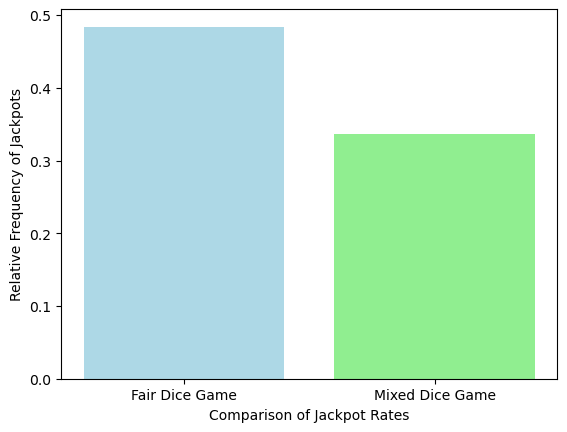

In [18]:
import matplotlib.pyplot as plt

rel_freq_game1 = analyzer1.jackpot() / 1000
rel_freq_game2 = analyzer2.jackpot() / 1000

plt.bar(['Fair Dice Game', 'Mixed Dice Game'], [rel_freq_game1, rel_freq_game2], color = ['lightblue', 'lightgreen'])
plt.ylabel('Relative Frequency of Jackpots')
plt.xlabel('Comparison of Jackpot Rates')

plt.show()
        

## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

In [27]:
dice1 = Die(np.array([1, 2, 3, 4, 5, 6]))
dice2 = Die(np.array([1, 2, 3, 4, 5, 6]))
dice3 = Die(np.array([1, 2, 3, 4, 5, 6]))

print(dice1.show())
print(dice2.show())
print(dice3.show())

      weight
face        
1        1.0
2        1.0
3        1.0
4        1.0
5        1.0
6        1.0
      weight
face        
1        1.0
2        1.0
3        1.0
4        1.0
5        1.0
6        1.0
      weight
face        
1        1.0
2        1.0
3        1.0
4        1.0
5        1.0
6        1.0


Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

In [28]:
fair_dice = Die(np.array([1, 2, 3, 4, 5, 6]))

unfair_dice1 = Die(np.array([1, 2, 3, 4, 5, 6]))
unfair_dice1.change_weight(6, 5)

print(fair_dice.show())
print(unfair_dice1.show())

      weight
face        
1        1.0
2        1.0
3        1.0
4        1.0
5        1.0
6        1.0
      weight
face        
1        1.0
2        1.0
3        1.0
4        1.0
5        1.0
6        5.0


Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

In [29]:
unfair_dice2 = Die(np.array([1, 2, 3, 4, 5, 6]))
unfair_dice2.change_weight(1, 5)

print(fair_dice.show())
print(unfair_dice1.show())
print(unfair_dice2.show())

      weight
face        
1        1.0
2        1.0
3        1.0
4        1.0
5        1.0
6        1.0
      weight
face        
1        1.0
2        1.0
3        1.0
4        1.0
5        1.0
6        5.0
      weight
face        
1        5.0
2        1.0
3        1.0
4        1.0
5        1.0
6        1.0


Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [30]:
dice = [fair_dice, fair_dice, fair_dice]
game3 = Game(dice)

game3.play(10000)

print("First 5 results:")
print(game3.show().head())

First 5 results:
             0  1  2
roll_number         
0            5  2  3
1            1  5  1
2            3  4  1
3            6  1  3
4            2  2  5


Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [31]:
dice = [fair_dice, unfair_dice1, unfair_dice2]
game4 = Game(dice)

game4.play(10000)

print("First 5 results:")
print(game4.show().head())

First 5 results:
             0  1  2
roll_number         
0            6  6  1
1            4  1  2
2            5  6  4
3            5  5  3
4            5  3  1


Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

Relative frequency of Jackpots in Game 3:  0.03
Relative frequency of Jackpots in Game 4:  0.02


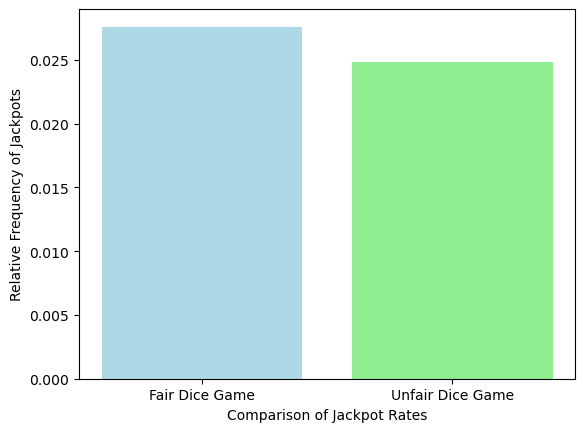

In [35]:
analyzer_fair = Analyzer(game3)
analyzer_unfair = Analyzer(game4)

jackpot_fair = analyzer_fair.jackpot()
jackpot_unfair = analyzer_unfair.jackpot()

total_rolls = 10000

rel_freq_game3 = jackpot_fair / total_rolls
print(f"Relative frequency of Jackpots in Game 3: {rel_freq_game3: .2f}")
rel_freq_game4 = jackpot_unfair / total_rolls
print(f"Relative frequency of Jackpots in Game 4: {rel_freq_game4: .2f}")

plt.bar(['Fair Dice Game', 'Unfair Dice Game'], [rel_freq_game3, rel_freq_game4], color = ['lightblue', 'lightgreen'])
plt.ylabel('Relative Frequency of Jackpots')
plt.xlabel('Comparison of Jackpot Rates')

plt.show()

## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

In [39]:
letters = []
counts = []
with open('english_letters.txt', 'r') as f:
          for line in f:
              parts = line.strip().split()
              if len(parts) != 2:
                  continue
              letter, count = parts
              letters.append(letter)
              counts.append(int(count))

faces = np.array(letters)
weights = np.array(counts, dtype = float)

letter_die = Die(faces)
for face, w in zip(faces, weights):
        letter_die.change_weight(face, w)
        
print(letter_die.show())

           weight
face             
E     529117365.0
T     390965105.0
A     374061888.0
O     326627740.0
I     320410057.0
N     313720540.0
S     294300210.0
R     277000841.0
H     216768975.0
L     183996130.0
D     169330528.0
C     138416451.0
U     117295780.0
M     110504544.0
F      95422055.0
G      91258980.0
P      90376747.0
W      79843664.0
Y      75294515.0
B      70195826.0
V      46337161.0
K      35373464.0
J       9613410.0
X       8369915.0
Z       4975847.0
Q       4550166.0


Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

In [41]:
dice = [letter_die, letter_die, letter_die, letter_die]

game_a = Game(dice)
game_a.play(1000)

print(game_a.show().head())

             0  1  2  3
roll_number            
0            A  R  N  B
1            E  E  C  O
2            T  O  P  S
3            F  N  S  A
4            T  E  M  O


Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

In [46]:
scrabble_words = set()
with open('scrabble_words.txt', 'r') as file:
    for line in file:
        scrabble_words.add(line.strip().lower())

game_b = Game([letter_die, letter_die, letter_die, letter_die])
game_b.play(1000)

analyzer_b = Analyzer(game_b)
permutations_df = analyzer_b.permutation_count()

permutations = [tuple(perm) for perm in permutations_df.index]
valid_word_count = 1

for perm in permutations:
    word = ''.join(perm).lower()
    if word in scrabble_words:
        valid_word_count += 1

print(f"Number of valid English word permutations: {valid_word_count} out of {len(permutations)}")

Number of valid English word permutations: 57 out of 992


Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).

In [47]:
game_c = Game([letter_die, letter_die, letter_die, letter_die, letter_die])

game_c.play(1000)

analyzer_c = Analyzer(game_c)
permutations_c_df = analyzer_c.permutation_count()

permutations_c = [tuple(perm) for perm in permutations_c_df.index]
valid_word_count = 1

for perm in permutations_c:
    word = ''.join(perm).lower()
    if word in scrabble_words:
        valid_word_count += 1

print(f"Number of valid English word permutations: {valid_word_count} out of {len(permutations_c)}")

Number of valid English word permutations: 6 out of 1000


Our first game with 4 letter dice actually created more English words (57) than our game with 5 dice (6).